In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv('Salary_Data.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


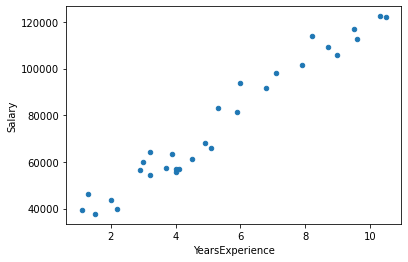

In [4]:
salary.plot(kind='scatter',x='YearsExperience',y='Salary')
plt.show()

In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


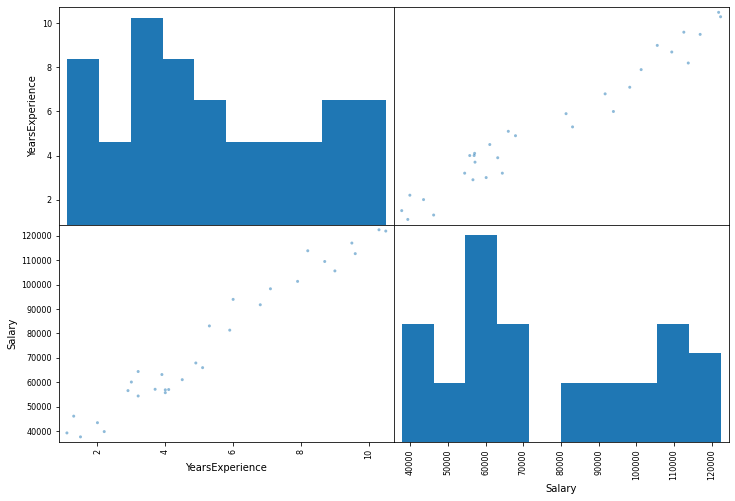

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(salary[['YearsExperience','Salary']], figsize=(12,8))
plt.show()

In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
X = salary.drop('Salary',axis=1)

In [9]:
y = salary.drop('YearsExperience',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [12]:
predictions

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [13]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_test, predictions, squared=False)

In [14]:
lin_rmse

7059.0436219015055

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
salary_predictions = tree_reg.predict(X_test)

In [17]:
salary_predictions

array([116969.,  66029., 101302.,  66029.,  54445.,  63218.])

In [18]:
tree_rmse = mean_squared_error(y_test, salary_predictions,squared=False)

In [19]:
tree_rmse

10052.248993799016

In [20]:
from sklearn.model_selection import cross_val_score
lin_reg_rmse = -cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)

In [21]:
pd.Series(lin_reg_rmse).describe()

count       10.000000
mean      5054.679033
std       2502.608480
min       1874.902059
25%       3708.826705
50%       5062.067075
75%       6089.017370
max      10540.927853
dtype: float64

In [22]:
dec_tree_rmse = -cross_val_score(DecisionTreeRegressor(), X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)

In [23]:
pd.Series(dec_tree_rmse).describe()

count      10.000000
mean     5890.369688
std      2659.198059
min      2134.948009
25%      4133.930760
50%      5874.622016
75%      8228.634057
max      9283.587507
dtype: float64

In [24]:
print(lin_reg_rmse)

[ 3877.78734925  6228.89106722  6505.82513279  5669.39627759
  3652.50649064  5220.05232842  2072.41995207  1874.9020594
  4904.08182089 10540.92785275]
